In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model1 = CmdStanModel(stan_file='code_1.stan')
model2 = CmdStanModel(stan_file='code_2.stan')
model3 = CmdStanModel(stan_file='code_3.stan')
model4 = CmdStanModel(stan_file='code_4.stan')
model5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_1.stan to exe file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_1.exe
INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_2.stan to exe file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_2.exe
INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_3.stan to exe file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_3.exe
INFO:cmdstanpy:compiling stan file C:\Users\Filip\Desktop\DataAnalysis\Data-Analytics\lab8\code_4.stan to exe file C:\Users\Fil

In [3]:
F=len("Filip")
L=len("Zmijewski")
N = (L+F)*100
stan_data = {
    "N":N,
}

In [4]:
fit_1 = model1.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

fit_2 = model2.sample(data={'N':N}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

y1 = fit_1.stan_variable('y')
y2 = fit_2.stan_variable('y')


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [5]:
fit_3 = model3.sample(data={'N':N, 'y':y1[0]} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

fit_4 = model4.sample(data={'N':N, 'y':y1[0]} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


exercise 2

c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Filip\anaconda3\envs\Modelowanie\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using

<AxesSubplot:xlabel='Log'>

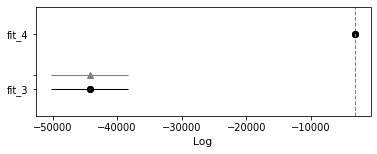

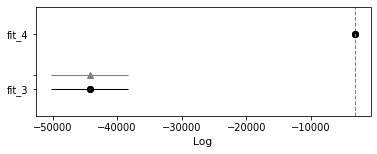

In [9]:
compare_dict = {'fit_3': fit_3, 'fit_4': fit_4}
loo_compare = az.compare(compare_dict, ic="loo")
waic_compare = az.compare(compare_dict, ic="waic")
az.plot_compare(loo_compare)
az.plot_compare(waic_compare)